## Introduction
The project is about finding the most popular content category for a social media company called "Social Buzz".
I will be using three datasets to achieve this objective. The datasets are:
* Content
* Reaction
* ReactionTypes
More details on the datasets:
### Content
ID: Unique ID of the content that was uploaded (automatically generated)

User ID: Unique ID of a user that exists in the User table

Type: A string detailing the type of content that was uploaded

Category: A string detailing the category that this content is relevant to

URL: Link to the location where this content is stored

### Reaction
Content ID: Unique ID of a piece of content that was uploaded

User ID: Unique ID of a user that exists in the User table who reacted to this piece of content

Type: A string detailing the type of reaction this user gave

Datetime: The date and time of this reaction

### ReactionTypes
Type: A string detailing the type of reaction this user gave

Sentiment: A string detailing whether this type of reaction is considered as positive, negative or neutral

Score: This is a number calculated by Social Buzz that quantifies how “popular” each reaction is. A reaction type with a higher score
should be considered as a more popular reaction.

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline 

import math

## Data Wrangling

### Data Gathering  

In [2]:
#import datasets
df1 = pd.read_csv('Content.csv',index_col=0)
df2 = pd.read_csv('Reactions.csv',index_col=0)
df3 = pd.read_csv('ReactionTypes.csv',index_col=0)

### Assessing Data

### Visual Assessment

#### Content dataset (df1)

In [3]:
#show all rows and columns from dataset
df1

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
...,...,...,...,...,...
995,b4cef9ef-627b-41d7-a051-5961b0204ebb,5b62e10e-3c19-4d28-a57c-e9bdc3d6758d,video,public speaking,NaN
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,4fe420fa-a193-4408-bd5d-62a020233609,GIF,technology,https://socialbuzz.cdn.com/content/storage/7a7...
997,435007a5-6261-4d8b-b0a4-55fdc189754b,35d6a1f3-e358-4d4b-8074-05f3b7f35c2a,audio,veganism,https://socialbuzz.cdn.com/content/storage/435...
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,b9bcd994-f000-4f6b-87fc-caae08acfaa1,GIF,culture,https://socialbuzz.cdn.com/content/storage/4e4...


#### Reactions dataset (df2)

In [4]:
df2

,Content ID,User ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
...,...,...,...,...
25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48
25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02
25550,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,interested,2020-09-12 03:54:58
25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31


#### Reaction Types dataset (df3)

In [5]:
df3

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30
5,indifferent,neutral,20
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72


### Programmatic Assessment

#### Content dataset (df1)

In [6]:
#list first 5 rows
df1.head()

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [7]:
#check the number of rows, columns, datatypes and missing data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  1000 non-null   object
 1   User ID     1000 non-null   object
 2   Type        1000 non-null   object
 3   Category    1000 non-null   object
 4   URL         801 non-null    object
dtypes: object(5)
memory usage: 46.9+ KB


In [8]:
#check basic statistics
df1.describe()

,Content ID,User ID,Type,Category,URL
count,1000,1000,1000,1000,801
unique,1000,446,4,41,801
top,97522e57-d9ab-4bd6-97bf-c24d952602d2,72d2587e-8fae-4626-a73d-352e6465ba0f,photo,technology,https://socialbuzz.cdn.com/content/storage/975...
freq,1,8,261,71,1


In [9]:
#check for null values
df1.isna().sum()

Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [10]:
#check for duplicates
df1.duplicated().sum()

0

In [11]:
#check for duplicates in User ID
df1["User ID"].duplicated().sum()

554

In [12]:
#check the unique values in Type
df1.Type.unique()

array(['photo', 'video', 'GIF', 'audio'], dtype=object)

In [13]:
#check the unique values in Type
df1.Category.unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [14]:
#see the format of the values
df1.Category.value_counts()

technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: Category, 

#### Reactions dataset (df2)

In [15]:
#list first 5 rows
df2.head()

,Content ID,User ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [16]:
#check the number of rows, columns, datatypes and missing data
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25553 entries, 0 to 25552
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  25553 non-null  object
 1   User ID     22534 non-null  object
 2   Type        24573 non-null  object
 3   Datetime    25553 non-null  object
dtypes: object(4)
memory usage: 998.2+ KB


In [17]:
#check basic statistics
df2.describe()

,Content ID,User ID,Type,Datetime
count,25553,22534,24573,25553
unique,980,500,16,25542
top,4b2d0fff-3b4f-43ca-a7df-c430479cb9ba,c76c3393-88e2-47b0-ac37-dc4f2053f5a5,heart,2020-10-29 20:51:08
freq,49,65,1622,2


In [18]:
#check for null values
df2.isna().sum()

Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [19]:
#check for duplicates
df2.duplicated().sum()

0

In [20]:
#check for duplicates in User ID
df2["User ID"].duplicated().sum()

25052

In [21]:
#check the unique values in Type
df2.Type.unique()

array([nan, 'disgust', 'dislike', 'scared', 'interested', 'peeking',
       'cherish', 'hate', 'love', 'indifferent', 'super love',
       'intrigued', 'worried', 'like', 'heart', 'want', 'adore'],
      dtype=object)

#### Reaction Types dataset (df3)

In [22]:
#list first 5 rows
df3.head()

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [23]:
#check the number of rows, columns, datatypes and missing data
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       16 non-null     object
 1   Sentiment  16 non-null     object
 2   Score      16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes


In [24]:
#check basic statistics
df3.describe()

,Score
count,16.000000
mean,39.625000
std,26.901983
min,0.000000
25%,14.250000
50%,40.000000
75%,66.250000
max,75.000000


In [25]:
#check for null values
df3.isna().sum()

Type         0
Sentiment    0
Score        0
dtype: int64

In [26]:
#check for duplicates
df3.duplicated().sum()

0

In [27]:
#check the unique values in Type
df3.Type.unique()

array(['heart', 'want', 'disgust', 'hate', 'interested', 'indifferent',
       'love', 'super love', 'cherish', 'adore', 'like', 'dislike',
       'intrigued', 'peeking', 'scared', 'worried'], dtype=object)

In [28]:
#check the unique values in Sentiment
df3.Sentiment.unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [29]:
#check the unique values in Score
df3.Score.unique()

array([60, 70,  0,  5, 30, 20, 65, 75, 72, 50, 10, 45, 35, 15, 12],
      dtype=int64)

### Quality issues
#### Content dataset (df1)

* Content ID and User ID column names are not convenient to use
* Type column name is not appropriate
* User ID column is present
* Missing data is present in URL
* Category column contains different format of values

#### Reactions dataset (df2)

* Content ID and User ID column names are not convenient to use
* Datetime column datatype is string which should not be
* Missing data is present in User ID
* Missing data is present in Type

### Tidiness issues

* The first two tables and the Score column from the third dataset are not merged together

### Cleaning

### Quality Issues

In [30]:
#make a copy of the 3 dataset before cleaning
#rename `Content ID` to ContendID
df1_copy = df1.copy()
df2_copy = df2.copy()
df3_copy = df3.copy()

#### Content dataset (df1)

#### Define
I will rename `Content ID` to `ContendID`, and `User ID` to `UserID`

#### Code

In [31]:
#rename Content ID to ContendID
df1.rename(columns={'Content ID':'ContentID','User ID':'UserID'}, inplace=True)

#### Test

In [32]:
#list the column names
df1.columns

Index(['ContentID', 'UserID', 'Type', 'Category', 'URL'], dtype='object')

#### Define
I will rename `Type` to `ContendType`

#### Code

In [33]:
#rename Content ID to ContendID
df1.rename(columns={'Type':'ContentType'}, inplace=True)

#### Test

In [34]:
#list the column names
df1.columns

Index(['ContentID', 'UserID', 'ContentType', 'Category', 'URL'], dtype='object')

#### Define
Drop the UserID column since it will not be needed during the analysis

#### Code

In [35]:
#drop UserID column
df1.drop(columns='UserID', inplace=True)

#### Test

In [36]:
#see if UserID column exists
df1.columns

Index(['ContentID', 'ContentType', 'Category', 'URL'], dtype='object')

#### Define
Drop the URL column since it will not be needed during the analysis

#### Code

In [37]:
#drop URL column
df1.drop(columns='URL', inplace=True)

#### Test

In [38]:
#see if URL column exists
df1.columns

Index(['ContentID', 'ContentType', 'Category'], dtype='object')

#### Define
Values in the `Category` column will be standardized by stripping out the quotes and converting all to lower case

#### Code

In [39]:
#strip off the quotes that are present in some
df1.Category = df1.Category.str.strip('""')
#turn the values to all lower case
df1.Category = df1.Category.str.lower()

#### Test

In [40]:
#see if the values are in the same format
df1.Category.value_counts()

technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
studying           58
dogs               58
public speaking    50
veganism           50
Name: Category, dtype: int64

#### Reactions dataset (df2)

#### Define
I will rename `Content ID` to `ContendID`, and `User ID` to `UserID`

#### Code

In [41]:
#rename Content ID to ContendID
df2.rename(columns={'Content ID':'ContentID','User ID':'UserID'}, inplace=True)

#### Test

In [42]:
#list the column names
df2.columns

Index(['ContentID', 'UserID', 'Type', 'Datetime'], dtype='object')

#### Define
I will change `datetime` datatype to `datetime` datatype

#### Code

In [43]:
#change datetime datatype to datetime
df2.Datetime = pd.to_datetime(df2.Datetime)

#### Test

In [44]:
#see the datatype of the columns
df2.dtypes

ContentID            object
UserID               object
Type                 object
Datetime     datetime64[ns]
dtype: object

#### Define
Drop the UserID column since it will not be needed during the analysis

#### Code

In [45]:
#drop UserID column
df2.drop(columns='UserID', inplace=True)

#### Test

In [46]:
#see if UserID column exists
df2.columns

Index(['ContentID', 'Type', 'Datetime'], dtype='object')

#### Define
I will drop rows that has missing values for the `Type` column

#### Code

In [47]:
#drop rows that has missing values for the Type column
df2.dropna(subset='Type', inplace=True)

#### Test

In [48]:
#see if missing values exist
df2.isna().sum()

ContentID    0
Type         0
Datetime     0
dtype: int64

#### Reaction Types dataset (df3)

### Tidiness Issues

#### Define
I will merge df1 and df2 on `ContentID` and also add a Score column from df3 to the merged dataset

#### Code

In [49]:
#merge df1 and df2 on ContentID
df_master = pd.merge(df1, df2, on=['ContentID'])

In [50]:
#make a function that returns the score for a reaction type, using df3
def score(reaction):
    reaction_types = list(df3.Type)
    if reaction in reaction_types:
        return (df3.loc[df3.Type == reaction].Score[reaction_types.index(reaction)])
    else:
        raise ValueError("wrong type")

In [51]:
#create Score column in df_master to keep track of the score for each reaction
df_master['Score'] = df_master.Type.apply(score)

#### Test

In [52]:
#see the datatype of the columns
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ContentID    24573 non-null  object        
 1   ContentType  24573 non-null  object        
 2   Category     24573 non-null  object        
 3   Type         24573 non-null  object        
 4   Datetime     24573 non-null  datetime64[ns]
 5   Score        24573 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.3+ MB


In [53]:
#convert dataframe to csv
df_master.to_csv('accenture_master.csv')

### Visualization

### Dataset structure
The master dataset that I will be using has 18,384 rows and 9 columns. Most of the features datatypes are object(strings) while only two are int and datetime datatype.

### Main feature(s) of interest in your dataset
My main feature of interest is Category. I want to know the most popular category on `SocialBuzz`

### Features in the dataset that will help support my investigation into the feature(s) of interest
I would like to use Type and Score to help me in finding the most popular content categories on `SocialBuzz`. I will also use the Datetime variable to know the month people reacted most.

### Univariate Exploration¶
I will begin my exploration with Category, my main feature of interest

#### Distribution of Category

In [54]:
#see the overview of values in Category
df_master.Category.value_counts()

animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: Category, dtype: int64

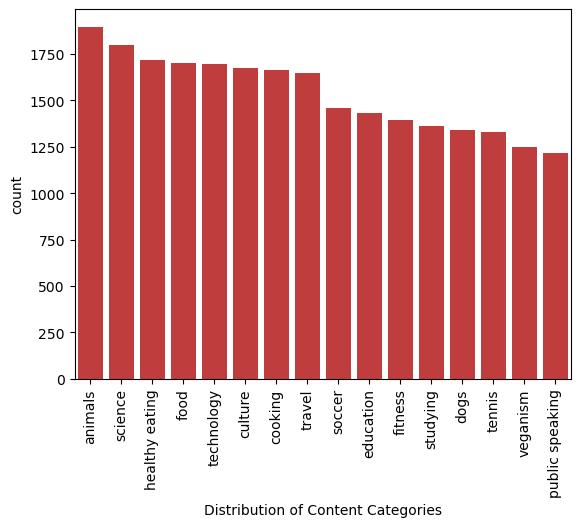

In [55]:
#get the content categories frequency and their indices
base_color = sb.color_palette()[3]
freq = df_master.Category.value_counts()
content_category_order = freq.index
#plot the bar chart of content categories in decreasing order of frequency
sb.countplot(data=df_master, x='Category', color=base_color, order=content_category_order);
plt.xticks(rotation = 90);
plt.xlabel('Distribution of Content Categories');

In the above plot, animals category is the most posted content category, followed by science. The least posted content category is public speaking.

#### Distribution of Type

Next, I will explore the distribution of `Type` variable

In [56]:
#see the overview of values in Type
df_master.Type.value_counts()

heart          1622
scared         1572
peeking        1559
hate           1552
interested     1549
dislike        1548
adore          1548
want           1539
love           1534
disgust        1526
like           1520
super love     1519
indifferent    1512
cherish        1501
worried        1497
intrigued      1475
Name: Type, dtype: int64

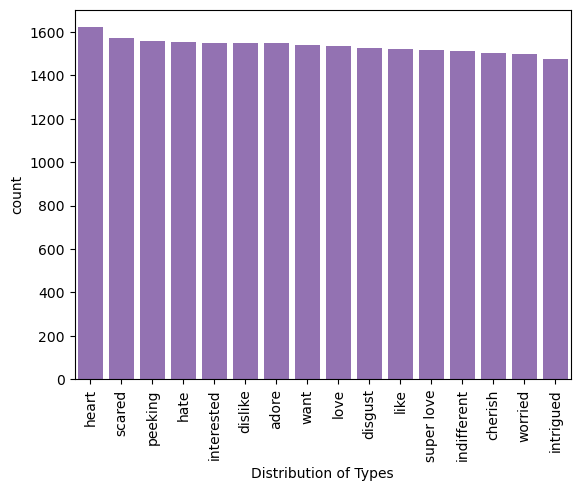

In [57]:
#get the Type categories frequency and their indices
base_color = sb.color_palette()[4]
freq = df_master.Type.value_counts()
type_category_order = freq.index
#plot the bar chart of Type categories in decreasing order of frequency
sb.countplot(data=df_master, x='Type', color=base_color, order=type_category_order);
plt.xticks(rotation = 90);
plt.xlabel('Distribution of Types');

The plot above reveals that we have little difference in the frequency of each type as evidenced by the close height of the bars. Interestingly, `heart` type is the most used and `intrigued` type is the least used.

#### Distribution of Score

I will now explore the distribution of the `Score` variable

In [58]:
#display basic statistics of the variable
df_master.Score.describe()

count    24573.000000
mean        39.622553
std         26.043011
min          0.000000
25%         15.000000
50%         35.000000
75%         65.000000
max         75.000000
Name: Score, dtype: float64

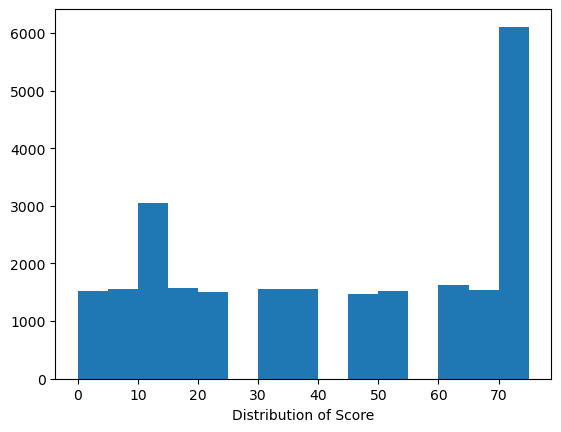

In [59]:
#plot the histogram distribution of Score
bins = np.arange(0, df_master.Score.max()+5, 5)
plt.hist(data = df_master, x = 'Score', bins = bins);
plt.xlabel('Distribution of Score');

Since the Score variable is not continuous, there are gaps in the distribution of the dataset. The distribution has two peaks (bimodal)

### Popular month that people reacted most
I will now investigate the popular month in which reactions are much

In [60]:
#create a new dataframe that include month only, then get the most frequent month
df_month = df_master.Datetime.dt.month.reset_index(name='month').set_index('index')
df_month

,month
index,
0,11
1,6
2,4
3,1
4,8
...,...
24568,6
24569,2
24570,9


In [61]:
#create a list to map the month number to their name
months_tuple = ['month','January','February','March','April','May','June','July','August','September','October','November','December']
#replace the month numbers with their name
df_month.month = df_month.month.apply(lambda x: months_tuple[x])
df_month

,month
index,
0,November
1,June
2,April
3,January
4,August
...,...
24568,June
24569,February
24570,September


In [62]:
#group the data by the month amd generate a new dataframe
df_month = df_month.groupby('month').value_counts().reset_index(name = 'count')
df_month

,month,count
0,April,1974
1,August,2114
2,December,2092
3,February,1914
4,January,2126
5,July,2070
6,June,2021
7,March,2012
8,May,2138
9,November,2034


In [63]:
#sort values using count column in descending order
df_month.sort_values(by = 'count', ascending = False, inplace=True)

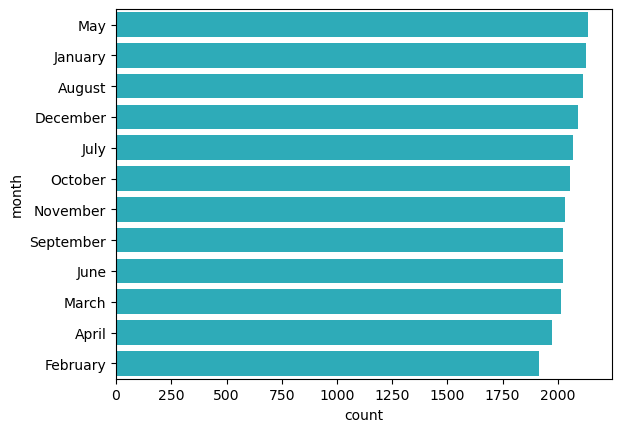

In [64]:
#plot the barchart of each month
base_color = sb.color_palette()[9]
sb.barplot(data= df_month, x ='count', y = 'month', color=base_color);

The chart shows that people reacted most in the month of May, January, August, December and July

### Distribution of the variable of interest
Since the `Category` variable is a qualitative one, the bar chart shows that `animals` category is the most posted content category, followed by `science`. The least posted content category is `public speaking`.

### Distribution of the supporting variables


The bar chart plot for the `Type` variable reveals that we have little difference in the frequency of each type as evidenced by the close height of the bars. Interestingly, heart type is the most used and intrigued type is the least used.

Since the `Score` variable is not continuous, there are gaps in the distribution of the dataset as shown on the histogram. The distribution has two peaks (bimodal)

The Datetime analysis shows that people reacted most in the month of May, January, August, December and July. I will not go ahead analyzing the Datetime column, as I have discovered the trend needed.

## Bivariate Exploration
To continue my research, I will now look at the relationships between my variable of interest (`Category`) and other supporting variables (`Type` and `Score`)

#### `Category` Vs. `Type`
I will now investigate the relationship between the `Category` variable and the `Type` variable. To obtain a significant insight, I will sum up the frequency of the reactions for each category and plot against each category.

In [65]:
# Use group_by() and size() to classify the dataset based on Category and Type to obtain pandas Series
ct_counts = df_master.groupby(['Category', 'Type']).size()
# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')
ct_counts

,Category,Type,count
0,animals,adore,114
1,animals,cherish,125
2,animals,disgust,122
3,animals,dislike,115
4,animals,hate,128
...,...,...,...
251,veganism,peeking,89
252,veganism,scared,85
253,veganism,super love,79
254,veganism,want,77


In [66]:
# Use DataFrame.pivot() to rearrange the data, to have Category on rows
ct_counts = ct_counts.pivot(index = 'Category', columns = 'Type', values = 'count')
ct_counts

Type,adore,cherish,disgust,dislike,hate,heart,indifferent,interested,intrigued,like,love,peeking,scared,super love,want,worried
Category,,,,,,,,,,,,,,,,
animals,114,125,122,115,128,120,100,110,116,101,119,129,132,123,122,121
cooking,106,84,109,115,104,112,81,125,88,114,99,101,120,110,94,102
culture,95,113,98,112,94,97,111,110,101,97,108,99,117,100,122,102
dogs,81,72,87,84,87,97,93,91,70,93,73,92,89,84,83,62
education,83,87,73,91,96,91,89,88,96,90,105,99,80,92,83,90
fitness,96,73,96,95,71,83,82,81,82,111,88,86,96,100,72,83
food,93,119,107,106,130,107,97,108,94,100,123,115,101,89,110,100
healthy eating,122,105,103,101,121,114,108,101,107,106,103,104,100,116,111,95
public speaking,76,65,69,82,61,88,77,75,92,74,85,65,75,76,81,76


In [67]:
#get sum of all the reaction types
index = ct_counts.index
cols = ct_counts.columns
#sum up all the reaction frequency for each category
def sumup(index,cols):
    count = 0
    row = []#store the total frequency for each Category
    for ind in index:
        for col in cols:
            if not math.isnan(ct_counts.loc[ind,col]):
                if type(int(ct_counts.loc[ind,col])) == int:#locate the value
                    count += ct_counts.loc[ind,col]
                    #print(count)
        row.append(count)
        count = 0
    return row
#create a new column for the total frequency of reactions for each category
ct_counts['total'] = sumup(index,cols)
ct_counts

Type,adore,cherish,disgust,dislike,hate,heart,indifferent,interested,intrigued,like,love,peeking,scared,super love,want,worried,total
Category,,,,,,,,,,,,,,,,,
animals,114,125,122,115,128,120,100,110,116,101,119,129,132,123,122,121,1897
cooking,106,84,109,115,104,112,81,125,88,114,99,101,120,110,94,102,1664
culture,95,113,98,112,94,97,111,110,101,97,108,99,117,100,122,102,1676
dogs,81,72,87,84,87,97,93,91,70,93,73,92,89,84,83,62,1338
education,83,87,73,91,96,91,89,88,96,90,105,99,80,92,83,90,1433
fitness,96,73,96,95,71,83,82,81,82,111,88,86,96,100,72,83,1395
food,93,119,107,106,130,107,97,108,94,100,123,115,101,89,110,100,1699
healthy eating,122,105,103,101,121,114,108,101,107,106,103,104,100,116,111,95,1717
public speaking,76,65,69,82,61,88,77,75,92,74,85,65,75,76,81,76,1217


In [68]:
#create a new dataframe by extracting the total column
ct_counts_2 = ct_counts[['total']].copy()

In [69]:
#show the values in the new dataframe
ct_counts_2

Type,total
Category,
animals,1897
cooking,1664
culture,1676
dogs,1338
education,1433
fitness,1395
food,1699
healthy eating,1717
public speaking,1217


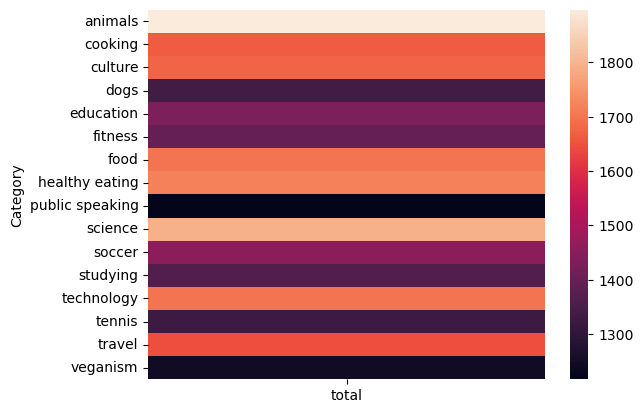

In [70]:
#plot the heatmap using the new dataframe to show the relationship between the categories and the total reactions type for each category
sb.heatmap(ct_counts_2);
plt.xlabel('');

The plot above reveals that `animals` category has the most number of reactions, while `veganism` and `public speaking` have the least number of reactions.

#### `Category` Vs. `Score`
Continuing my analysis, I will now study the relationship between the `Category` variable and the `Score` variable. I will sum up the total reaction scores for each category and plot it against each category.

In [71]:
# Use group_by() and size() to classify the dataset based on Category and Score to obtain pandas Series
gp_counts = df_master.groupby(['Category', 'Score']).size()
gp_counts
#Use Series.reset_index() to convert a series into a dataframe object
gp_counts = gp_counts.reset_index(name='count')
#drop count column because it is not needed
#gp_counts.drop(columns='count',inplace=True)
gp_counts

,Category,Score,count
0,animals,0,122
1,animals,5,128
2,animals,10,115
3,animals,12,121
4,animals,15,132
...,...,...,...
235,veganism,60,95
236,veganism,65,75
237,veganism,70,160
238,veganism,72,71


In [72]:
# Use DataFrame.pivot() to rearrange the data, to have Category on rows
gp_counts = gp_counts.pivot(index = 'Category', columns = 'Score', values = 'count')

In [73]:
#see the data
gp_counts

Score,0,5,10,12,15,20,30,35,45,50,60,65,70,72,75
Category,,,,,,,,,,,,,,,
animals,122,128,115,121,132,100,110,129,116,101,120,119,247,114,123
cooking,109,104,115,102,120,81,125,101,88,114,112,99,178,106,110
culture,98,94,112,102,117,111,110,99,101,97,97,108,235,95,100
dogs,87,87,84,62,89,93,91,92,70,93,97,73,155,81,84
education,73,96,91,90,80,89,88,99,96,90,91,105,170,83,92
fitness,96,71,95,83,96,82,81,86,82,111,83,88,145,96,100
food,107,130,106,100,101,97,108,115,94,100,107,123,229,93,89
healthy eating,103,121,101,95,100,108,101,104,107,106,114,103,216,122,116
public speaking,69,61,82,76,75,77,75,65,92,74,88,85,146,76,76


In [74]:
#get the indexex and columns in lists
gp_index = list(gp_counts.index)
gp_columns = list(gp_counts.columns)
gp_columns

[0, 5, 10, 12, 15, 20, 30, 35, 45, 50, 60, 65, 70, 72, 75]

In [75]:
#sum up all the scores received by each category
def sumup_cat(index,cols):
    count = 0
    row = []#store the total frequency for each Category
    for ind in index:
        for col in cols:
            if not math.isnan(gp_counts.loc[ind,col]):
                if type(int(gp_counts.loc[ind,col])) == int:#locate the value
                    count += int(col) * gp_counts.loc[ind,col]
                    #print(count)
        row.append(count)
        count = 0
    return row

gp_counts['total'] = sumup_cat(gp_index,gp_columns)
gp_counts

Score,0,5,10,12,15,20,30,35,45,50,60,65,70,72,75,total
Category,,,,,,,,,,,,,,,,
animals,122,128,115,121,132,100,110,129,116,101,120,119,247,114,123,74965
cooking,109,104,115,102,120,81,125,101,88,114,112,99,178,106,110,64756
culture,98,94,112,102,117,111,110,99,101,97,97,108,235,95,100,66579
dogs,87,87,84,62,89,93,91,92,70,93,97,73,155,81,84,52511
education,73,96,91,90,80,89,88,99,96,90,91,105,170,83,92,57436
fitness,96,71,95,83,96,82,81,86,82,111,83,88,145,96,100,55323
food,107,130,106,100,101,97,108,115,94,100,107,123,229,93,89,66676
healthy eating,103,121,101,95,100,108,101,104,107,106,114,103,216,122,116,69339
public speaking,69,61,82,76,75,77,75,65,92,74,88,85,146,76,76,49264


In [76]:
#create a new dataframe by extracting the total column
gp_counts_2 = gp_counts[['total']].copy()

In [77]:
#sort the values in the new dataframe by total
gp_counts_2.sort_values(by = ['total'], ascending = False, inplace=True)
gp_counts_2

Score,total
Category,
animals,74965
science,71168
healthy eating,69339
technology,68738
food,66676
culture,66579
travel,64880
cooking,64756
soccer,57783


In [78]:
#reset index to tuen Category into a column
gp_counts_2 = gp_counts_2.reset_index()

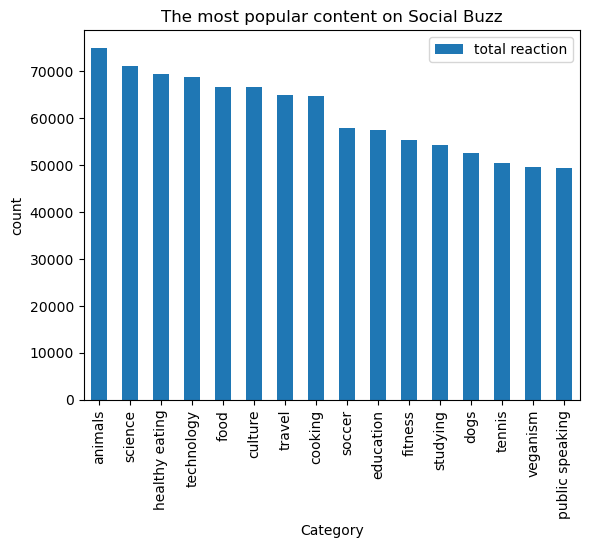

In [79]:
gp_counts_2.plot.bar(x = 'Category', y = 'total');
plt.title('The most popular content on Social Buzz');
plt.ylabel('count');
plt.legend(['total reaction']);

In [80]:
#isolate the top five content category from the rest
gp_counts_2 = gp_counts_2.iloc[0:5,:]
gp_counts_2

Score,Category,total
0,animals,74965
1,science,71168
2,healthy eating,69339
3,technology,68738
4,food,66676


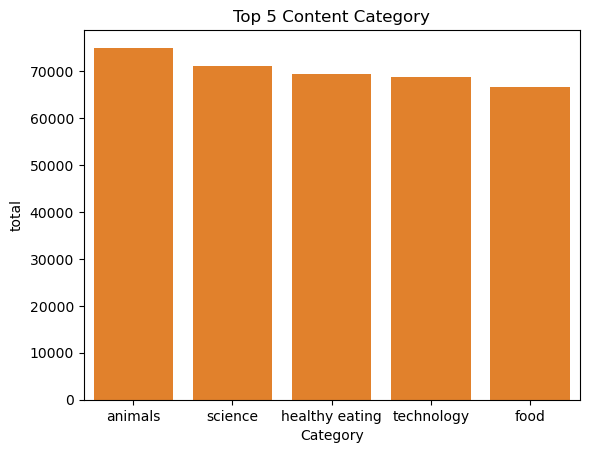

In [82]:
#plot the top five category
base_color = sb.color_palette()[1]
sb.barplot(data= gp_counts_2, x ='Category', y = 'total', color=base_color);
plt.title('Top 5 Content Category');

The plot reveals that the top five content categories are: `animals`, `science`, `healthy eating`, `technology`, and `food`, while the lowest content categories are: `veganism` and `public speaking`.

There is no need to further the exploration because all the needed information has been deduced.

## Conclusion
 The most popular content categories for "Social Buzz" are: `animals`, `science`, `healthy eating`, `technology`, and `food`